# **Stock Price Prediction - ML task**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

#Install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

# Download historical data for Tesla (TSLA)
df = yf.download('TSLA',
                 start='2000-01-01',
                 end=date.today(),
                 progress=False,)

df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
YF.download() has changed argument auto_adjust default to True


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [ ]:
import yfinance as yf
# Download historical data for Tesla (TSLA)
data = yf.download("TSLA", start="2018-01-01", end="2023-01-01")
data.to_csv("tesla_stock_data.csv")  # Save to CSV
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           TSLA       TSLA       TSLA       TSLA       TSLA
Date                                                             
2018-01-02  21.368668  21.474001  20.733334  20.799999   65283000
2018-01-03  21.150000  21.683332  21.036667  21.400000   67822500
2018-01-04  20.974667  21.236668  20.378668  20.858000  149194500
2018-01-05  21.105333  21.149332  20.799999  21.108000   68868000
2018-01-08  22.427334  22.468000  21.033333  21.066668  147891000


In [ ]:
# import numpy as np

# # Set seed for reproducibility
# np.random.seed(42)

# # Copy the original dataframe to avoid modifying it directly
# df_noisy = df.copy()
# df_noisy = df_noisy.apply(pd.to_numeric, errors='coerce')


# # Add Gaussian noise to each selected feature
# for col in df.columns:
#     noise = np.random.normal(loc=0.0, scale=0.10 * df_noisy[col].std(), size=df_noisy.shape[0])
#     df_noisy[col] += noise

# # Check the modified data
# df_noisy.head()



import numpy as np
import pandas as pd

# Start with a fresh copy
df_nonlinear = df.copy()

# Ensure all columns are numeric
df_nonlinear = df_nonlinear.apply(pd.to_numeric, errors='coerce')
df_nonlinear.dropna(inplace=True)

# Apply non-linear transformations to feature columns only
# Target column (Close) remains unchanged
df_nonlinear['Open'] = np.log1p(df_nonlinear['Open'])              # log(x+1)
df_nonlinear['High'] = np.sqrt(df_nonlinear['High'])              # sqrt(x)
df_nonlinear['Low'] = df_nonlinear['Low'] ** 1.5                  # power
df_nonlinear['Volume'] = np.log1p(df_nonlinear['Volume'])        # log
# df_nonlinear['Adj Close'] = np.sin(df_nonlinear['Adj Close'])    # sinusoidal pattern

# You can verify the transformed data
df_nonlinear.head()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2010-06-29,1.592667,1.290995,1.264466,0.818310,19.455623
2010-06-30,1.588667,1.424079,1.935962,1.000387,19.367720
2010-07-01,1.464000,1.314534,1.570882,0.980829,18.629985
2010-07-02,1.280000,1.240967,1.393072,0.929536,18.160575
2010-07-06,1.074000,1.154700,1.084137,0.847298,18.450274


## **Exploratory Data Analysis**
1. Load the dataset.
2. Analyze trends, moving averages, and volatility.
3. Visualize key metrics.

In [ ]:
# Load dataset
data = pd.read_csv("tesla_stock_data.csv")
print(data.columns);

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("tesla_stock_data.csv")

# Display basic info
print(data.info())
print(data.describe())

# Set Seaborn style
sns.set_style("darkgrid")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1261 non-null   object
 1   Close   1260 non-null   object
 2   High    1260 non-null   object
 3   Low     1260 non-null   object
 4   Open    1260 non-null   object
 5   Volume  1260 non-null   object
dtypes: object(6)
memory usage: 59.2+ KB
None
             Price               Close               High                 Low  \
count         1261                1260               1260                1260   
unique        1261                1248               1224                1237   
top     2022-12-30  16.899999618530273  20.30666732788086  18.700000762939453   
freq             1                   2                  3                   3   

        Open     Volume  
count   1260       1260  
unique  1233       1255  
top     24.0  103416000  
freq       4          2  


## **Plots:**

In [ ]:
# Ensure numeric columns are handled properly
df = df.dropna()  # Remove missing values

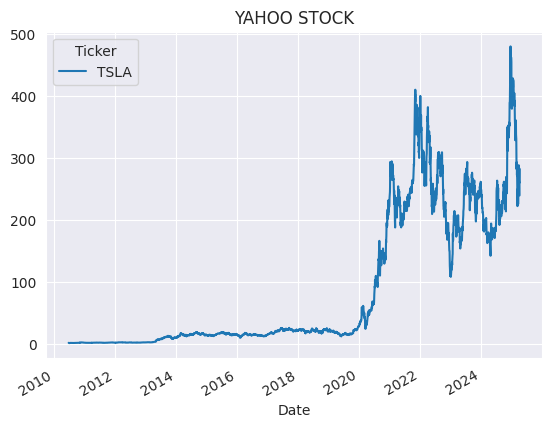

In [ ]:
#Create a simple chart
df.plot(y='Close', title='YAHOO STOCK')
plt.show()

In [ ]:
!pip install pandas-ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=6b72b9e6cc0f9fcca38514edcbd0c0fd433b5b16e8b9d323ed57621cdbb12a5e
  Stored in directory: /root/.cache/pip/wheels/7f/33/8b/50b245c5c65433cd8f5cb24ac15d97e5a3db2d41a8b6ae957d
Successfully built pandas-ta


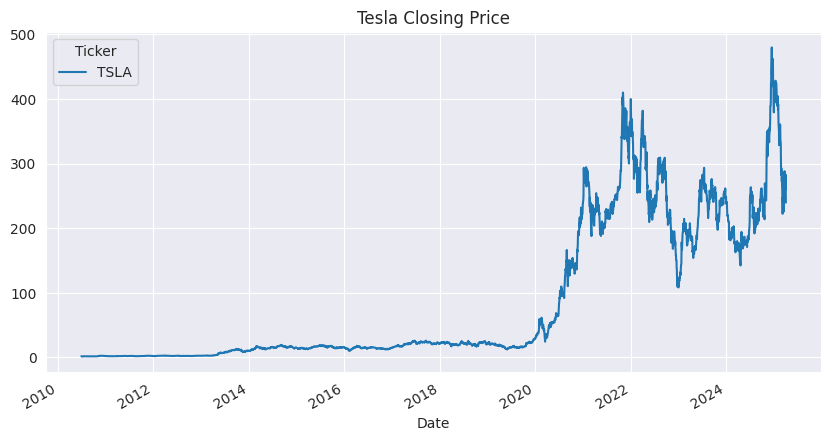

In [ ]:
# Plot Closing Price
df.plot(y='Close', title='Tesla Closing Price', figsize=(10, 5))
plt.show()

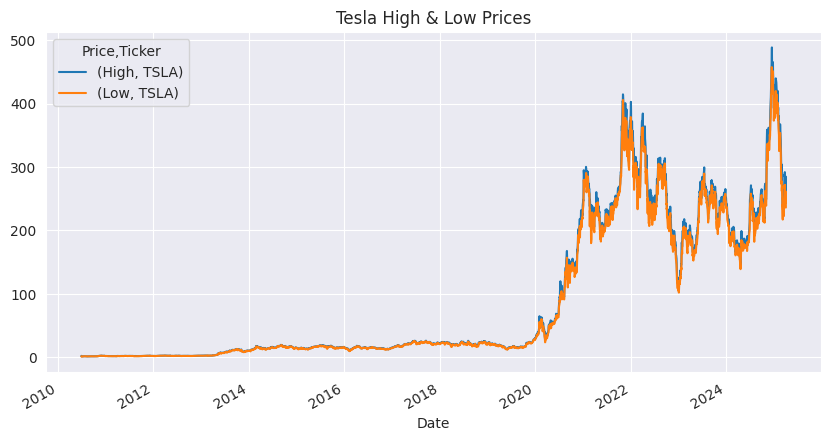

In [ ]:
# Plot High and Low Prices on the Same Graph
df.plot(y=['High', 'Low'], title='Tesla High & Low Prices', figsize=(10, 5))
plt.show()

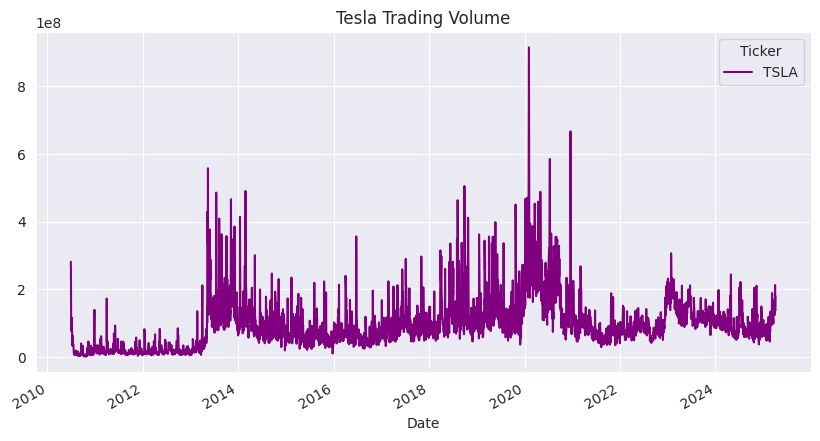

In [ ]:
# Plot Volume Over Time
df.plot(y='Volume', title='Tesla Trading Volume', figsize=(10, 5), color='purple')
plt.show()

In [ ]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,LABEL
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,0
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,0
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,0
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,0
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,0


In [ ]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

Price,Close,High,Low,Open,Volume,LABEL
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,0
2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,0
2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,0
2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,0
2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,0


# **1. Feasibility and Application of Ensemble Models**

Try these models:

 - Random Forest Regressor
 - Gradient Boosting Regressor
 - XGBoost Regressor

We must compare them with your previous Linear Regression and MLP models.

Use metrics like RMSE, MAE, and R² score.

# **Using Gradient Boosting model**
🔹 Steps in the Code:

1. Load and preprocess data (convert to numeric, handle missing values).
2. Split into training & testing sets (X_train, X_test, y_train, y_test).
3. Train using fit()
4. Make predictions using predict().
5. Evaluate performance using MSE and R².
6. Plot actual vs predicted prices.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Optional: Drop rows with any missing values (can happen with stock data)
df.dropna(inplace=True)

# Define features and target
# We'll predict the 'Close' price using other columns
X = df[['Open', 'High', 'Low', 'Volume']].values  # Independent variables
y = df['Close'].values  # Target variable (dependent variable)


# Split data into Training and Testing sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 7.72
R² Score: 0.9994


# **Using Random Forest model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.4f}")


Random Forest RMSE: 6.52
Random Forest R² Score: 0.9995


# **Using XGBoost model**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.4f}")


XGBoost RMSE: 11.84
XGBoost R² Score: 0.9990


# **2. Revaluating the results of the ensemble model:**


In [ ]:
import pandas as pd

# Create a DataFrame with results
results = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor'],
    'RMSE': [rmse_rf, rmse, rmse_xgb],
    'R² Score': [r2_rf, r2, r2_xgb]
})

# Set the model name as index for cleaner look (optional)
results.set_index('Model', inplace=True)

# Display the results with 2 decimal points for RMSE and 4 for R²
results = results.style.format({
    'RMSE': '{:.2f}',
    'R² Score': '{:.4f}'
}).set_caption("Model Performance Comparison")

print("Clearly, Random Forest Regressor is the best option, so using it...")
results

Clearly, Random Forest Regressor is the best option, so using it...


,RMSE,R² Score
Model,,
Random Forest Regressor,6.52,0.9995
Gradient Boosting Regressor,7.72,0.9994
XGBoost Regressor,11.84,0.9990


# **3. Compare the results with the existing system in the literature:**

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Model Performance
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.2f}, R²: {train_r2:.2f}")
print(f"Test MSE: {test_mse:.2f}, R²: {test_r2:.2f}")



Train MSE: 3.57, R²: 1.00
Test MSE: 4.01, R²: 1.00


In [ ]:
import pandas as pd

# Create a DataFrame with results
results = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression'],
    'RMSE': [rmse_rf, test_mse**0.5],
    'R² Score': [r2_rf, test_r2]
})

# Set the model name as index for cleaner look (optional)
results.set_index('Model', inplace=True)

# Display the results with 2 decimal points for RMSE and 4 for R²
results = results.style.format({
    'RMSE': '{:.2f}',
    'R² Score': '{:.4f}'
}).set_caption("Model Performance Comparison")

print("This dataset is a learning dataset meant for Lniear regression, so clearly it performs better than ensemble models.")
print("But at the same time, it is still evident that the random forest model does not disappoint")
results


This dataset is a learning dataset meant for Lniear regression, so clearly it performs better than ensemble models.
But at the same time, it is still evident that the random forest model does not disappoint


,RMSE,R² Score
Model,,
Random Forest Regressor,6.52,0.9995
Linear Regression,2.00,0.9997


In [ ]:
import joblib
from google.colab import files

# Save the trained model to a file
joblib.dump(rf, 'rf.pkl')
files.download('rf.pkl') # Use files from google.colab

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>